In [32]:
%load_ext cython
import sys
sys.path.append('/home/bram/ANTS')
sys.path.append('/home/bram/ANTS/entropy')
for p in sys.path:
    print(p)


/usr/lib/python36.zip
/usr/lib/python3.6
/usr/lib/python3.6/lib-dynload
/home/bram/PythonEnvs/Ants/lib/python3.6/site-packages
/home/bram/PythonEnvs/Ants/lib/python3.6/site-packages/IPython/extensions
/home/bram/.ipython
/home/bram/ANTS
/home/bram/ANTS/entropy
/home/bram/ANTS
/home/bram/ANTS/entropy


In [2]:
from cythonic.plugins.dummy_dicts import ant_dict, queen_dict, domain_dict, gauss_dict, sim_dict, deposit_dict, sens_dict
print(sim_dict)
print(domain_dict)
sim_dict['steps'] = 1000
domain_dict['pitch']=2

{'n_agents': 80, 'dt': 0.3, 'steps': 10, 'deploy_style': 'nest_radian', 'deploy_timing': 'gamma_dist', 'deploy_timing_args': {'k': 10.0, 'teta': 2.0}, 'evap_rate': -1.0}
{'size': [4000, 2000], 'pitch': 5, 'nest_loc': [1000, 1000], 'nest_rad': 150, 'food_loc': [3500, 1000], 'food_rad': 150, 'target_pheromone': 250000.0}


In [3]:
from cythonic.sim_wrapper import recorder
# from cythonic.plugins.dummy_dicts import ant_dict, queen_dict, domain_dict, gauss_dict, sim_dict, deposit_dict, sens_dict

sim_recorder = recorder(queen_args = queen_dict, domain_args = domain_dict, sim_args = sim_dict)
result = sim_recorder.time_full_sim(record = True, deposit_style = 'constant', deposit_dict = deposit_dict,gauss_dict = gauss_dict, upload_interval = 500)
print(result)

 
 Simulation with ID: 118
 
 It took a whopping 7366.270542144775 msec 

{'sim_id': 118, 'foodcount': 2, 'nestcount': 1, 'entropy_vec': [20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934, 20.934], 'start_entropy': 20.934, 'end_entropy': 20.934, 'scor

9.408999999999999
0.9924141172814958
0.9924141172814958
0.9924141172814958
0.9924141172814958
0.9924141172814958
0.9924141172814958
0.9924141172814958
0.9924141172814958
9.408999999999995
[-0.0, 3.321928094887362, 6.643856189774724, 9.965784284662087, 13.287712379549449, 16.609640474436812, 19.931568569324174, 23.253496664211536, 26.575424759098897, 29.897352853986263, 33.219280948873624, 36.541209043760986, 39.86313713864835, 43.18506523353571, 46.50699332842307, 49.82892142331043, 53.150849518197795, 56.47277761308516, 59.794705707972525, 63.11663380285989, 66.43856189774725, 69.7604899926346, 73.08241808752197, 76.40434618240933, 79.7262742772967, 83.04820237218406, 86.37013046707142, 89.69205856195879, 93.01398665684614, 96.33591475173351]


IndexError: index 11 is out of bounds for axis 0 with size 11

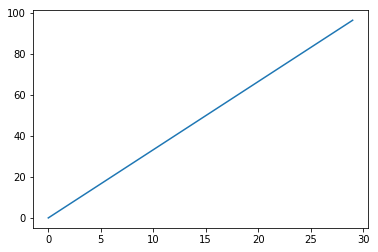

In [27]:
start = 10
evap = 0.97
atonce = start * evap**2
print(atonce)
import numpy as np
from matplotlib import pyplot

dt = 0.25
x = start
for i in range(int(2*np.ceil(1/dt))):
    print(evap**(dt))
    x*=evap**(dt)
print(x)

Q = [10**(-i) for i in range(30) ]
E = [-np.log2(q) for q in Q]
pyplot.plot(E)
print(E)

X = np.ones([11,11])


In [35]:
%%cython -a
from libc.math cimport exp as cexp
import numpy as np
print(np.exp(10))
print(cexp(10.))

cdef double result = cexp(10.)

22026.465794806718
22026.465794806718
